# Notebook on the Kaldor facts

This is a notebook which loads the Penn World Table, chooses a few countries, and plots the "Kaldor facts" for these countries. We learn that the Kaldor facts hold better for some countries than others...

## Preliminaries

### Loading the data from Penn World Table

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Download data from Penn World Table
url = "https://www.rug.nl/ggdc/docs/pwt100.xlsx"
data_in = pd.read_excel(url, sheet_name='Data')
data = data_in.copy() #copy it to a new name so as to not overwrite the original data

### Choosing countries, real GDP definition, and plotting settings

In [204]:
data['rgdpcap'] = data.rgdpna/data['pop']
countries = ['Norway', 'United States', 'Sweden', 'Germany','France']
lw= {'Sweden':1, 'Norway':3, 'United States':3, 'Germany':1, 'France':1}
alpha = {'Sweden': 0.5, 'Norway':1, 'United States':1, 'Germany':0.5, 'France':0.5}
color = {'Sweden': 'blue', 'Norway': 'black', 'United States': 'red', 'Germany': 'gray', 'France': 'orange'}

country_data = {}
for country in countries:
    data_temp = data.query('country == @country')
    data_temp.index = data_temp['year']
    country_data[country] = data_temp

## Real GDP per capita has increased over time

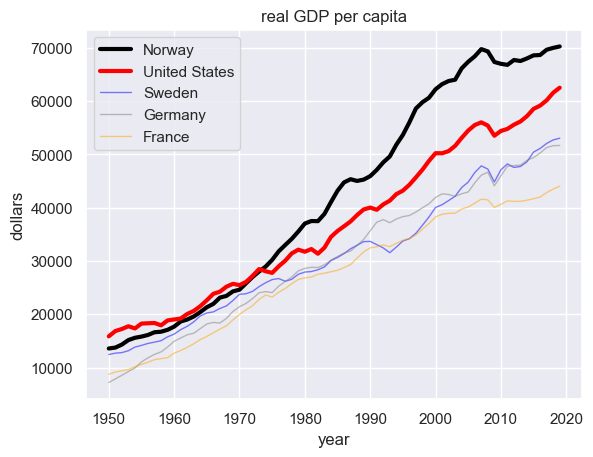

In [205]:
for country in countries:
    country_data[country]['rgdpcap'].plot(label=country, lw = lw[country], alpha = alpha[country], color = color[country])
    plt.legend()
plt.title("real GDP per capita")
plt.ylabel('dollars')
plt.show()

## Kaldor fact 1: GDP per capita growth is constant over time 

### US economy grows at two percent per year

In [206]:
import statsmodels.formula.api as smf
reg = smf.ols('np.log(rgdpcap) ~ year', country_data['United States']).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(rgdpcap)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     4464.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           9.55e-64
Time:                        13:00:52   Log-Likelihood:                 108.79
No. Observations:                  70   AIC:                            -213.6
Df Residuals:                      68   BIC:                            -209.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.2707      0.609    -49.686      0.000     -31.486     -29.055
year           0.0205      0.000     66.811      0.000       0.020       0.021
==============================================================================
Omnibus:                       17.874   Durbin-Watson:                   0.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.871
Skew:                          -0.521   Prob(JB):                       0.0322
Kurtosis:                       1.873   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### GDP per capita grows roughly linearly on a log scale

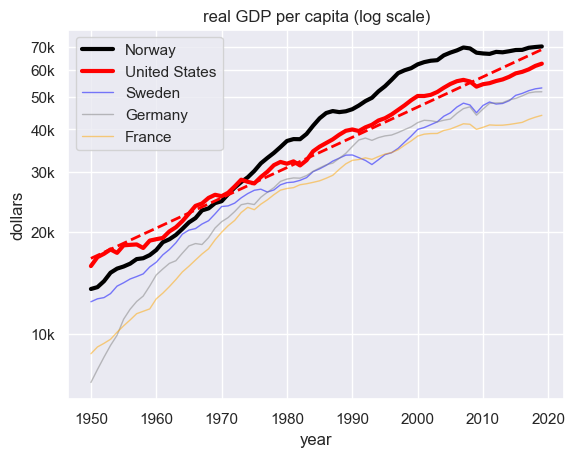

In [207]:
for country in countries:
    country_data[country]['rgdpcap'].plot(label=country, lw = lw[country], alpha = alpha[country], color = color[country])

plt.legend()
plt.title("real GDP per capita (log scale)")
plt.yscale('log')
plt.ylabel('dollars')
plt.yticks(np.arange(10000, 100000, 10000), [str(k)+'0k' for k in range(1,10)])
plt.plot([1950, 2019], [np.exp(reg.fittedvalues[1950]), np.exp(reg.fittedvalues[2019])], '--', color = 'red', lw = 2)
plt.show()

## Kaldor fact 2: the capital-output ratio is constant over time

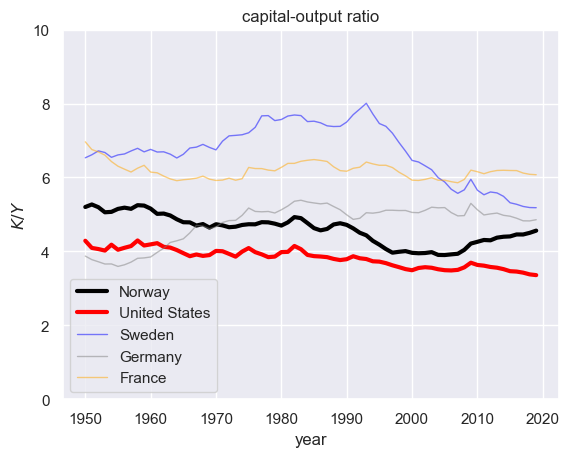

In [208]:
for country in countries:
    (country_data[country]['rnna']/country_data[country]['rgdpna']).plot(label=country, lw = lw[country], alpha = alpha[country], color = color[country])
plt.legend()
plt.title('capital-output ratio')
plt.ylabel("$K/Y$")
plt.ylim([0,10])
plt.show()

## Kaldor fact 3: the labor share is constant over time

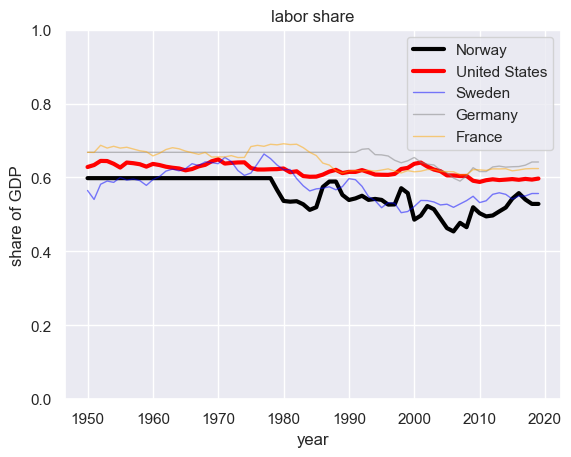

In [209]:
for country in countries:
    (country_data[country]['labsh']).plot(label=country, lw = lw[country], alpha = alpha[country], color = color[country])
plt.legend()
plt.title("labor share")
plt.ylim([0,1])
plt.ylabel('share of GDP')
plt.show()